# Read DB And Analysys

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [28]:
df = pd.read_parquet("price_Bitcoin.parquet", engine="pyarrow")
df['date']=pd.to_datetime(df['date'],format='%d-%m-%Y', dayfirst=True)
df = df.sort_values(by=["date"])
df["precioMa5d"] = df.groupby("cryptoName")["price"].rolling(window=5).mean().reset_index(level=0, drop=True)
df["precioMa14d"] = df.groupby("cryptoName")["price"].rolling(window=14).mean().reset_index(level=0, drop=True)


## Analysys: 5 day moving average
The key to this strategy is to observe the behavior of the moving average relative to the actual price. In this case, it is important to consider whether it is below the price (bull market) or above the price (bear market).

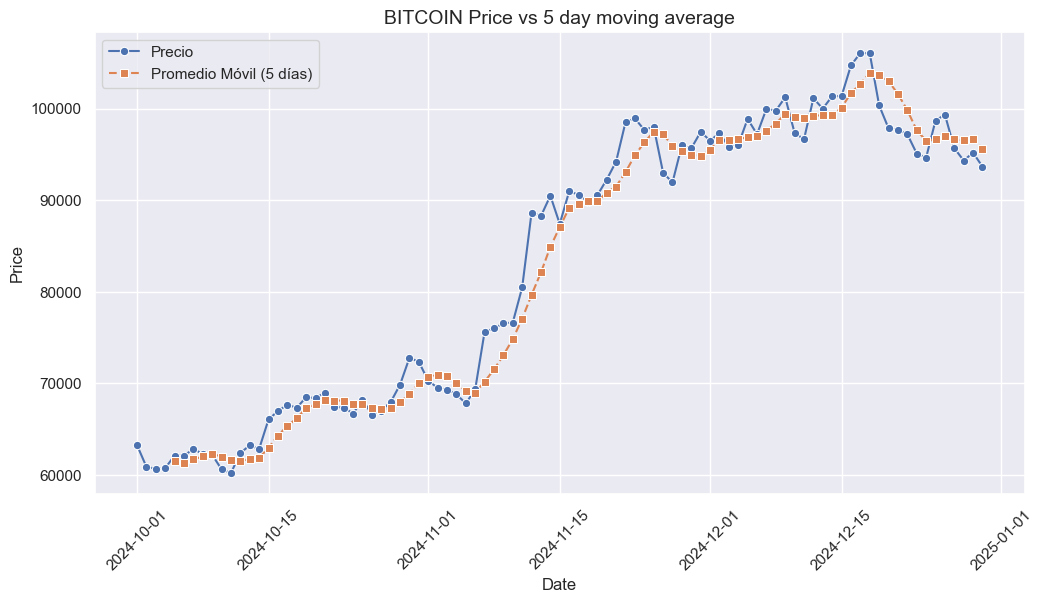

In [49]:
# Configurar el estilo de seaborn
sns.set(style="darkgrid")

# Crear la figura y el eje
plt.figure(figsize=(12, 6))
# Graficar la serie original
sns.lineplot(data=df, x="date", y="price", marker="o", label="Price")

# Graficar el promedio móvil de 5 días
sns.lineplot(data=df, x="date", y="precioMa5d",  marker="s", linestyle="dashed", label="Promedio Móvil (5 días)")

# Configurar títulos y etiquetas
plt.title("BITCOIN Price vs 5 day moving average", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor visibilidad

# Mostrar la gráfica
plt.show()

As we can see, from October 1st to the 15th, our moving average is very close to our current price, which means that there are bullish or bearish trends, but with little strength. I wouldn't recommend making transactions at these times, since the market is still defining the future trend; in other words, it's not entirely sure what the trend will be due to the weak strength it may have. It's important to consider that market transactions typically generate a commission, so it's difficult to generate value for our portfolio with these weak trends. Around October 20th, we found a much stronger bullish trend, so I would recommend that it may be a good time to make a purchase. As we can see, this trend, although it seemed strong, didn't last long (a week).
The strongest buying trend we see is starting on November 5th. The trend began with great force, which indicates that the previous trend was anticipating a future market movement. And likewise, if we ride this trend, we also see two good times to sell: 1. November 23rd, 2. December 18th.
Just as we previously analyzed the market entry, these indicate a strong downward trend, so this could represent a good time to sell assets.

## Extra: Aligator Analysys

 I added my favorite trading strategy, the Alligator. When the alligator open the mouth it means that there is an Bull market and when the mouth is the other way around it means that there is a bear market momentum. 
 To understand the order of the alligator's open mouth, we need to understand that the lips must always be the top line, and the teeth must be kept between the teeth and the jaw. The jaw is the floor of our moving averages.

In [40]:
def smma(df,period):
    return(df.ewm(alpha=1/period, adjust=False).mean())

In [41]:
df["Jaw"] = smma(df['price'],13).shift(8)
df['Teeth'] = smma(df['price'],8).shift(5)
df['Lips'] = smma(df['price'],5).shift(3)

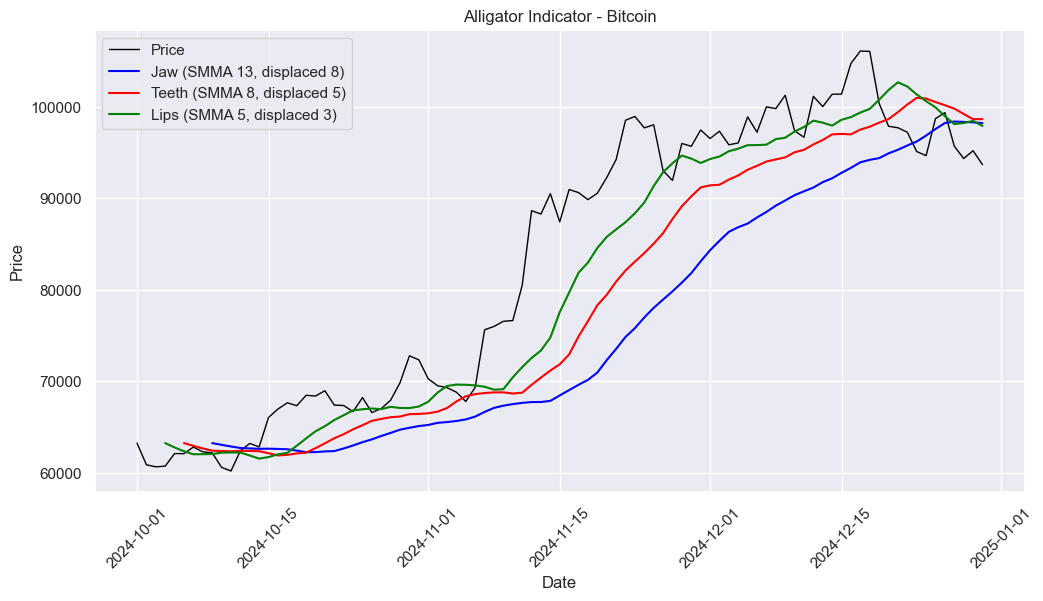

In [51]:
import matplotlib.pyplot as plt

# Convertir la columna de fecha a datetime si no lo está
df['date'] = pd.to_datetime(df['date'])

# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Graficar el precio de cierre
plt.plot(df['date'], df['price'], label='Price', color='black', linewidth=1)

# Graficar las líneas del Alligator
plt.plot(df['date'], df['Jaw'], label='Jaw (SMMA 13, displaced 8)', color='blue', linewidth=1.5)
plt.plot(df['date'], df['Teeth'], label='Teeth (SMMA 8, displaced 5)', color='red', linewidth=1.5)
plt.plot(df['date'], df['Lips'], label='Lips (SMMA 5, displaced 3)', color='green', linewidth=1.5)

# Configurar la gráfica
plt.title('Alligator Indicator - Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
plt.legend()
plt.grid(True)
plt.show()


Analysys: 


As we can see, at the beginning of October, we had the jaw lines in an incorrect or reversed order, which indicates a bearish trend in the market. If we were trading, it would be a good time to sell. To conclude this, we would have to add more time to our analysis. Starting on October 15th, we can see that the lines intersect, correcting the order. This is a good time to buy, or at least we know the market is having a positive projection for this asset.